### <label style="color:green"> PRACTICA FINAL MINERIA DE DATOS Y APRENDIZAJE MAQUINA </label>

##### Alumnos:
- <label style="color:green"> Alejandro Madrid </label>
- <label style="color:green"> Alejandro Garcia </label>

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [9]:
# Cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y , images = lfw_people.data, lfw_people.target, lfw_people.images
X.shape, y.shape, images.shape

((1456, 1850), (1456,), (1456, 50, 37))

In [14]:
# Dividimos en entrenamiento-testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, random_state=42) # Cambiaremos el randomState posteriormente para comprobar que funciona bien aunque alteremos el split
# Normalizamos los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((873, 1850), (873,), (583, 1850), (583,))

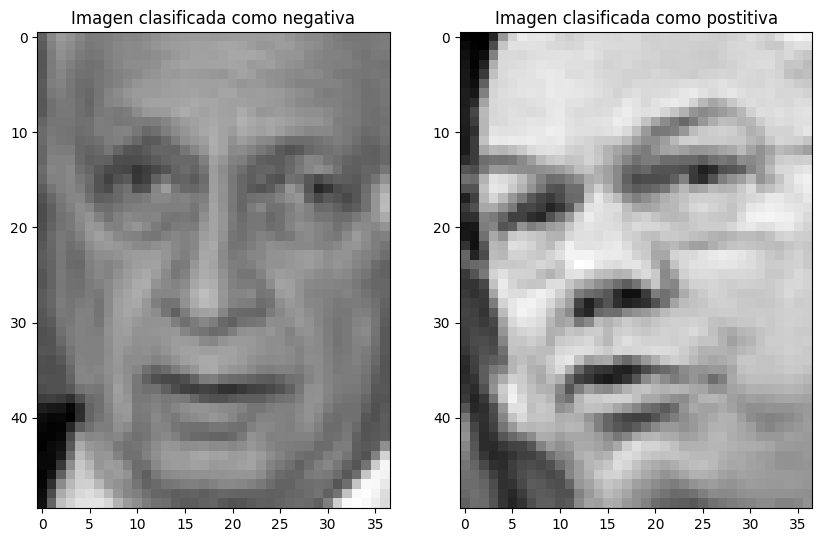

In [15]:
# Vamos a mostrar una imagen de las que usamos como clase positiva y otra de las negativas
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(images[y==0][0], cmap='gray')
plt.title("Imagen clasificada como negativa")
plt.subplot(1,2,2)
plt.imshow(images[y==1][0], cmap='gray')
plt.title("Imagen clasificada como postitiva")
plt.show()

In [17]:
# Definimos los m'etodos de reducci'on de la dimensionalidad que vamos a aplicar
# Ahora vamos a aplicar los m'etodos de reducci'on de la dimensionalidad
methods = {
    'PCA' :     PCA(n_components=2),
    'MDS' :     MDS(n_components=2),
    'ISOMAP':   Isomap(n_components=2),
    'LLE':      LocallyLinearEmbedding(n_components=2)
}

In [19]:
X_train_reduced = {} # Guardamos en el diccionario los datos de entrenamiento de menor dimensionalidad
X_test_reduced = {} # Guardamos en el diccionario los datos de testeo de menor dimensionalidad
tiempo_ejecucion = {} # Guardamos en el diccionario el tiempo de ejecucion de cada metodo
#
for name, method in methods.items():
        start_time = time.time()
        X_train_reduced[name] = method.fit_transform(X_train_scaled)
        X_test_reduced[name] = method.fit_transform(X_test_scaled)
        end_time = time.time()
        tiempo_ejecucion[name] = end_time - start_time
        

In [20]:
def plot_preprocessing(X_data, Y_data, labels, method_name): # Funci'on para representar los datos preprocesados 
    plt.figure(figsize=(10,6))
    plt.scatter(X_data, Y_data, c=labels, cmap='viridis', label=method_name)
    plt.title(f'Reduction with {method_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend() 
    plt.show()

def print_data_preprocessing(X_data, Y_data, method_name):
    print(X_data, '\n', Y_data, f'\nfor method -->{method_name}')
    print(f'X shape --> {X_data.shape}')
    print(f'Y shape --> {Y_data.shape}')

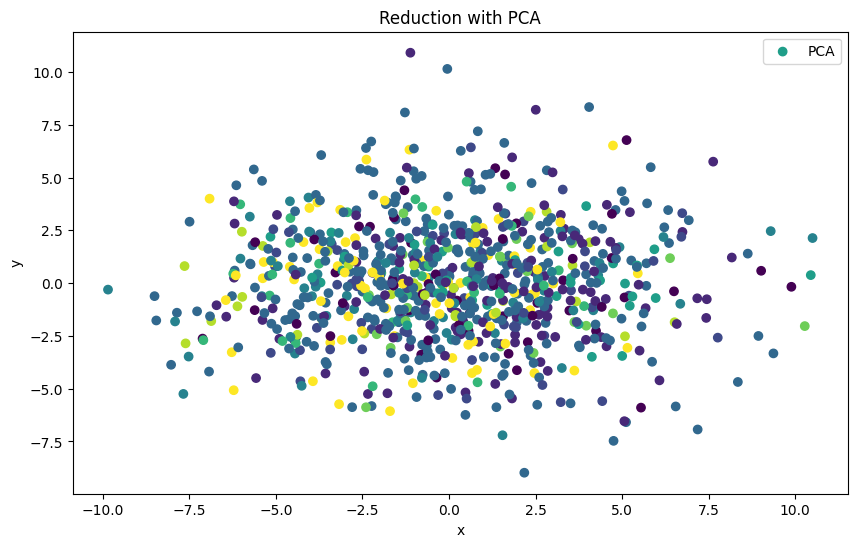

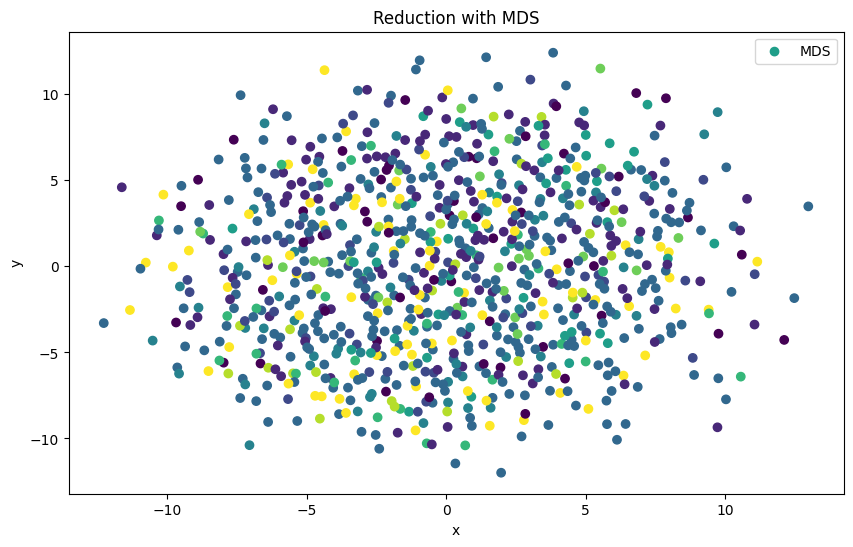

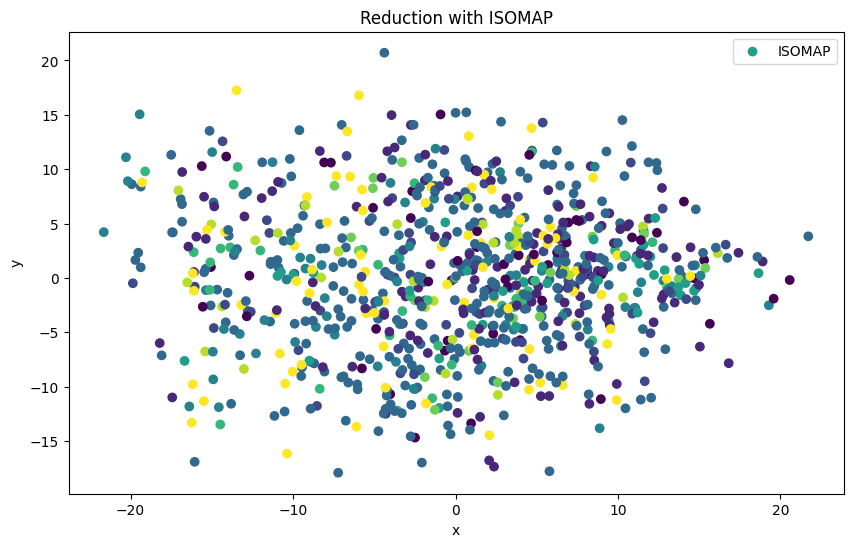

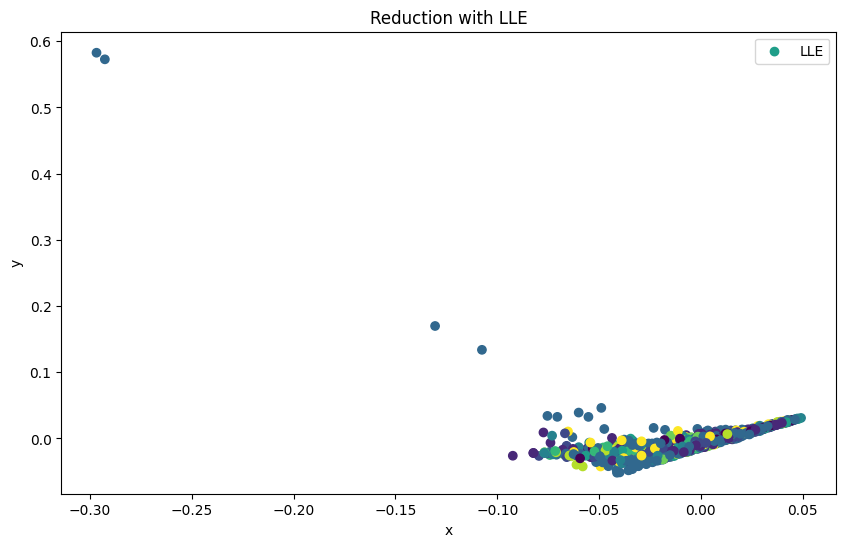

In [21]:
# Ahora graficamos los m'etodos de reducci'on 
for name, X_train_data in X_train_reduced.items():
    plot_preprocessing(X_train_data[:,0], X_train_data[:,1], y_train, name)
    # Vamos a mostrar el .shape de los originales y los reducidos de dimensionalidad junto al tiempo que ha tardado en ejecutarse

### Which one to use?
TODO: Explain which one to use

### Aplicación de modelos

#### Resnet

In [ ]:
METHOD = Isomap(n_components=2)

MODELS = {
    
}